# Overview of Time Series Libraries in Python

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from ucimlrepo import fetch_ucirepo 
from prophet import Prophet

## Air Quality

In [6]:
# fetch dataset 
air_quality = fetch_ucirepo(id=360) # Import from UCI Repository directly

# Extract the DataFrame from the dictionary
airquality_df = air_quality['data']['features']

# Display the first few rows
airquality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [7]:
airquality_df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [8]:
airquality_df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [9]:
airquality_df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [10]:
#airquality_df.dropna(inplace = True)

In [11]:
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [12]:
airquality_df[['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']]

,CO(GT),C6H6(GT),T,RH,AH
0,2.6,11.9,13.6,48.9,0.7578
1,2.0,9.4,13.3,47.7,0.7255
2,2.2,9.0,11.9,54.0,0.7502
3,2.2,9.2,11.0,60.0,0.7867
4,1.6,6.5,11.2,59.6,0.7888
...,...,...,...,...,...
9352,3.1,13.5,21.9,29.3,0.7568
9353,2.4,11.4,24.3,23.7,0.7119
9354,2.4,12.4,26.9,18.3,0.6406
9355,2.1,9.5,28.3,13.5,0.5139


In the old file, these column were object types. This code below is not necessary now.

```Python
# Define the list of columns to clean
cleanup = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

# Convert numeric values stored as strings with commas into proper floats
for i in cleanup:
    airquality_df[i] = airquality_df[i].apply(lambda x: x.replace(',', '.')).astype('float64')

# Display the cleaned columns to verify
airquality_df[['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']]
```

In [15]:
airquality_df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

In [16]:
airquality_df['Date']

0       3/10/2004
1       3/10/2004
2       3/10/2004
3       3/10/2004
4       3/10/2004
          ...    
9352     4/4/2005
9353     4/4/2005
9354     4/4/2005
9355     4/4/2005
9356     4/4/2005
Name: Date, Length: 9357, dtype: object

In [17]:
airquality_df['Date'] = pd.to_datetime(airquality_df['Date'])

In [18]:
airquality_df['Date'] 

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]

In [19]:
airquality_df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)               int64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)             int64
NOx(GT)                   int64
PT08.S3(NOx)              int64
NO2(GT)                   int64
PT08.S4(NO2)              int64
PT08.S5(O3)               int64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [20]:
airquality_df['Time']

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object

In [21]:
airquality_df['Time'] = pd.to_timedelta(airquality_df['Time'])

In [22]:
airquality_df['Time']

0      0 days 18:00:00
1      0 days 19:00:00
2      0 days 20:00:00
3      0 days 21:00:00
4      0 days 22:00:00
             ...      
9352   0 days 10:00:00
9353   0 days 11:00:00
9354   0 days 12:00:00
9355   0 days 13:00:00
9356   0 days 14:00:00
Name: Time, Length: 9357, dtype: timedelta64[ns]

In [23]:
airquality_df['Timestamp'] = airquality_df['Date'] + airquality_df['Time']

airquality_df['Timestamp']

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: Timestamp, Length: 9357, dtype: datetime64[ns]

In [24]:
airquality_df.head(5).transpose()

,0,1,2,3,4
Date,2004-03-10 00:00:00,2004-03-10 00:00:00,2004-03-10 00:00:00,2004-03-10 00:00:00,2004-03-10 00:00:00
Time,0 days 18:00:00,0 days 19:00:00,0 days 20:00:00,0 days 21:00:00,0 days 22:00:00
CO(GT),2.6,2.0,2.2,2.2,1.6
PT08.S1(CO),1360,1292,1402,1376,1272
NMHC(GT),150,112,88,80,51
C6H6(GT),11.9,9.4,9.0,9.2,6.5
PT08.S2(NMHC),1046,955,939,948,836
NOx(GT),166,103,131,172,131
PT08.S3(NOx),1056,1174,1140,1092,1205
NO2(GT),113,92,114,122,116


### Converting Values

In [26]:
airquality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Timestamp
0,2004-03-10,0 days 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2004-03-10,0 days 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2004-03-10,0 days 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2004-03-10,0 days 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,2004-03-10,0 days 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


#### Convert mg/m^3 to ppm

In [28]:
airquality_co_mgm3 = np.array(airquality_df['CO(GT)'])
airquality_co_mgm3

array([2.6, 2. , 2.2, ..., 2.4, 2.1, 2.2])

In [29]:
airquality_co_ppm = airquality_co_mgm3 * 0.001
airquality_co_ppm

array([0.0026, 0.002 , 0.0022, ..., 0.0024, 0.0021, 0.0022])

#### Total non metallic Hydro Carbon + Benzene in mircogram/m^3

In [31]:
airquality_nmhc_microm3 = np.array(airquality_df['NMHC(GT)'])
airquality_nmhc_microm3

array([ 150,  112,   88, ..., -200, -200, -200], dtype=int64)

In [32]:
airquality_ben_microm3 = np.array(airquality_df['C6H6(GT)'])
airquality_ben_microm3

array([11.9,  9.4,  9. , ..., 12.4,  9.5, 11.9])

In [33]:
airquality_nmhc_microm3 + airquality_ben_microm3

array([ 161.9,  121.4,   97. , ..., -187.6, -190.5, -188.1])

### Statistics on Time Series

In [35]:
np.mean(airquality_co_ppm)

-0.03420752377898899

In [36]:
np.median(airquality_co_ppm)

0.0015

In [37]:
np.max(airquality_co_ppm)

0.0119

In [38]:
np.min(airquality_co_ppm)

-0.2

In [39]:
np.std(airquality_co_ppm)

0.07765302055281113

# Prophet

In [41]:
airquality_df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Timestamp
0,2004-03-10,0 days 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2004-03-10,0 days 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2004-03-10,0 days 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2004-03-10,0 days 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,2004-03-10,0 days 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


In [42]:
airquality_df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Timestamp'],
      dtype='object')

In [43]:
# Create a pivot table to aggregate air quality data             
airquality_df_pivot = airquality_df.pivot_table(
    
    index=['Date'],                                                # Use 'Date' as the index to group by day
    values=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',       # Columns to aggregate (various air quality measures)
            'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 
            'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], 
    aggfunc='mean'                                                 # Compute the mean for each column per day
)

airquality_df_pivot.head(3)

,AH,C6H6(GT),CO(GT),NMHC(GT),NO2(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),RH,T
Date,,,,,,,,,,,,,
2004-03-10,0.765633,8.450000,1.966667,86.5,108.833333,132.000000,1316.500000,912.333333,1167.333333,1545.500000,1096.000,54.900000,12.033333
2004-03-11,0.775767,7.979167,-6.187500,104.5,87.375000,130.041667,1244.166667,851.958333,1277.250000,1522.833333,885.250,64.075000,9.837500
2004-03-12,0.663104,12.129167,-14.095833,141.5,89.916667,142.583333,1281.666667,1008.291667,1101.875000,1627.291667,1084.375,51.095833,11.287500


In [44]:
airquality_df_pivot.reset_index(inplace = True)

airquality_df_pivot.head(3)

,Date,AH,C6H6(GT),CO(GT),NMHC(GT),NO2(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),RH,T
0,2004-03-10,0.765633,8.450000,1.966667,86.5,108.833333,132.000000,1316.500000,912.333333,1167.333333,1545.500000,1096.000,54.900000,12.033333
1,2004-03-11,0.775767,7.979167,-6.187500,104.5,87.375000,130.041667,1244.166667,851.958333,1277.250000,1522.833333,885.250,64.075000,9.837500
2,2004-03-12,0.663104,12.129167,-14.095833,141.5,89.916667,142.583333,1281.666667,1008.291667,1101.875000,1627.291667,1084.375,51.095833,11.287500


To build the forecast model, let us make use of only two columns from the pivot data frame: Date and RH.

In [46]:
# Create a new DataFrame for Prophet modeling                     
airquality_prophet = airquality_df[['Date', 'RH']].copy(deep=True)  

# Display the new DataFrame                                     
airquality_prophet

,Date,RH
0,2004-03-10,48.9
1,2004-03-10,47.7
2,2004-03-10,54.0
3,2004-03-10,60.0
4,2004-03-10,59.6
...,...,...
9352,2005-04-04,29.3
9353,2005-04-04,23.7
9354,2005-04-04,18.3
9355,2005-04-04,13.5


Data Frame provided as input to Prophet's fit must have columns ds (date type) and y, the time series. If self.growth is 'logistic', then df must also have a column cap that specifies the capacity at each ds.

In [48]:
# Prophet requires specific column names

airquality_prophet.columns = ['ds', 'y']
airquality_prophet

# airquality_prophet.rename(columns={'Date': 'ds', 'RH': 'y'}, inplace=True)

,ds,y
0,2004-03-10,48.9
1,2004-03-10,47.7
2,2004-03-10,54.0
3,2004-03-10,60.0
4,2004-03-10,59.6
...,...,...
9352,2005-04-04,29.3
9353,2005-04-04,23.7
9354,2005-04-04,18.3
9355,2005-04-04,13.5


In [49]:
# Create an instance of the Prophet model
model = Prophet()

# Fit the Prophet model to the data         
model.fit(airquality_prophet)

13:43:00 - cmdstanpy - INFO - Chain [1] start processing
13:43:00 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
# Create 10 additional future time steps based on the existing data
predictions = model.make_future_dataframe(periods = 10)
predictions

,ds
0,2004-03-10
1,2004-03-11
2,2004-03-12
3,2004-03-13
4,2004-03-14
...,...
396,2005-04-10
397,2005-04-11
398,2005-04-12
399,2005-04-13


The aggregate data finishing in 390.

In [52]:
airquality_df_pivot.tail()

,Date,AH,C6H6(GT),CO(GT),NMHC(GT),NO2(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),RH,T
386,2005-03-31,0.951917,5.220833,1.387500,-200.0,100.708333,185.083333,1008.125000,749.416667,795.666667,1176.541667,763.833333,50.083333,17.550000
387,2005-04-01,0.636529,3.412500,-7.270833,-200.0,107.333333,161.833333,903.291667,663.000000,946.875000,943.250000,523.958333,35.962500,15.929167
388,2005-04-02,0.546167,2.529167,0.854167,-200.0,100.166667,142.375000,890.958333,616.291667,991.750000,864.333333,481.750000,32.225000,15.483333
389,2005-04-03,0.617583,4.316667,1.141667,-200.0,111.125000,167.666667,981.375000,714.708333,856.166667,985.166667,717.083333,33.695833,18.383333
390,2005-04-04,0.724787,8.440000,-11.393333,-200.0,122.000000,263.333333,1090.533333,862.266667,745.266667,1195.066667,995.266667,42.786667,16.960000


In [53]:
forecast = model.predict(predictions)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-03-10,50.237200,-17.518557,114.412889,50.237200,50.237200,-3.469959,-3.469959,-3.469959,-3.469959,-3.469959,-3.469959,0.0,0.0,0.0,46.767241
1,2004-03-11,50.043769,-16.283671,109.346381,50.043769,50.043769,-2.459388,-2.459388,-2.459388,-2.459388,-2.459388,-2.459388,0.0,0.0,0.0,47.584381
2,2004-03-12,49.850337,-27.031819,104.951174,49.850337,49.850337,-8.377759,-8.377759,-8.377759,-8.377759,-8.377759,-8.377759,0.0,0.0,0.0,41.472579
3,2004-03-13,49.656906,-4.786352,121.305501,49.656906,49.656906,6.454809,6.454809,6.454809,6.454809,6.454809,6.454809,0.0,0.0,0.0,56.111715
4,2004-03-14,49.463475,-9.165110,118.379957,49.463475,49.463475,4.740126,4.740126,4.740126,4.740126,4.740126,4.740126,0.0,0.0,0.0,54.203601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2005-04-10,48.997194,-6.532944,118.852866,48.872993,49.169427,4.740126,4.740126,4.740126,4.740126,4.740126,4.740126,0.0,0.0,0.0,53.737321
397,2005-04-11,49.205886,-11.763093,114.056113,48.993895,49.449761,2.162069,2.162069,2.162069,2.162069,2.162069,2.162069,0.0,0.0,0.0,51.367955
398,2005-04-12,49.414578,-12.451110,114.895358,49.140815,49.740939,0.950101,0.950101,0.950101,0.950101,0.950101,0.950101,0.0,0.0,0.0,50.364680
399,2005-04-13,49.623270,-12.945858,106.761044,49.280089,50.014626,-3.469959,-3.469959,-3.469959,-3.469959,-3.469959,-3.469959,0.0,0.0,0.0,46.153311


In [54]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2004-03-10,46.767241,-17.518557,114.412889
1,2004-03-11,47.584381,-16.283671,109.346381
2,2004-03-12,41.472579,-27.031819,104.951174
3,2004-03-13,56.111715,-4.786352,121.305501
4,2004-03-14,54.203601,-9.165110,118.379957
...,...,...,...,...
396,2005-04-10,53.737321,-6.532944,118.852866
397,2005-04-11,51.367955,-11.763093,114.056113
398,2005-04-12,50.364680,-12.451110,114.895358
399,2005-04-13,46.153311,-12.945858,106.761044


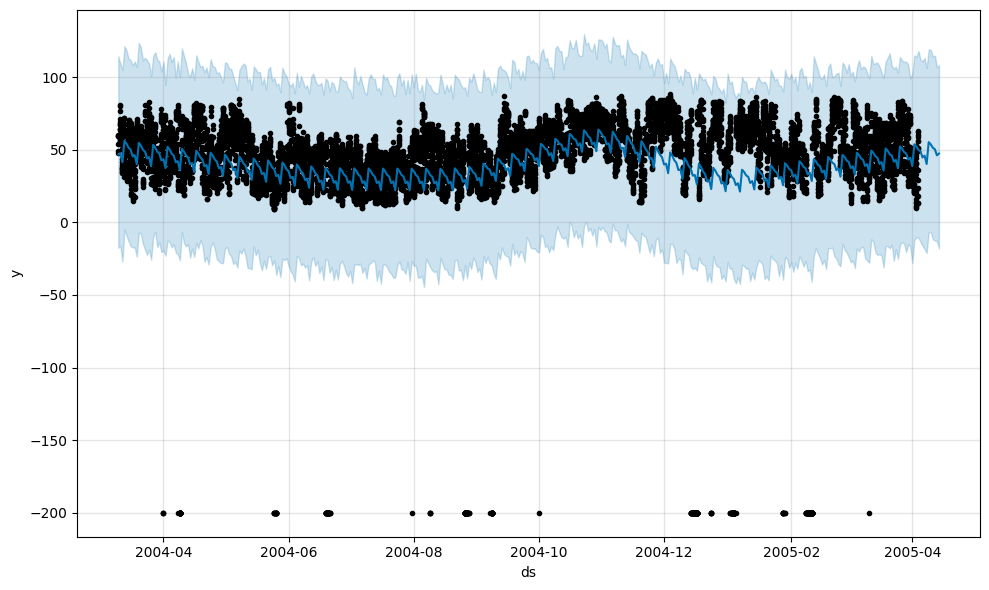

In [55]:
chart1 = model.plot(forecast)

In [56]:
airquality_prophet.describe()

,ds,y
count,9357,9357.000000
mean,2004-09-21 04:30:05.193972480,39.485380
min,2004-03-10 00:00:00,-200.000000
25%,2004-06-16 00:00:00,34.100000
50%,2004-09-21 00:00:00,48.600000
75%,2004-12-28 00:00:00,61.900000
max,2005-04-04 00:00:00,88.700000
std,NaN,51.216145


In [57]:
airquality_prophet.describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).transpose()

,count,mean,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max,std
ds,9357,2004-09-21 04:30:05.193972480,2004-03-10 00:00:00,2004-04-18 00:00:00,2004-05-27 00:00:00,2004-07-05 00:00:00,2004-08-13 00:00:00,2004-09-21 00:00:00,2004-10-30 00:00:00,2004-12-08 00:00:00,2005-01-16 00:00:00,2005-02-24 00:00:00,2005-04-04 00:00:00,NaN
y,9357.0,39.48538,-200.0,21.8,30.5,37.2,43.3,48.6,53.6,59.02,64.8,72.1,88.7,51.216145


In [58]:
airquality_prophet.describe(percentiles = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1]).transpose()

,count,mean,min,1%,2%,3%,4%,5%,10%,50%,max,std
ds,9357,2004-09-21 04:30:05.193972480,2004-03-10 00:00:00,2004-03-14 00:00:00,2004-03-18 00:00:00,2004-03-22 00:00:00,2004-03-26 00:00:00,2004-03-30 00:00:00,2004-04-18 00:00:00,2004-09-21 00:00:00,2005-04-04 00:00:00,NaN
y,9357.0,39.48538,-200.0,-200.0,-200.0,-200.0,10.048,15.0,21.8,48.6,88.7,51.216145


In [59]:
airquality_prophet.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [60]:
airquality_prophet[(airquality_prophet['y']> -200) & (airquality_prophet['y']< 10)]

,ds,y
1817,2004-05-25,9.9
1818,2004-05-25,9.8
1819,2004-05-25,9.2
1820,2004-05-25,9.3
1821,2004-05-25,9.2
2851,2004-07-07,9.6
9335,2005-04-03,9.9


Let us handle the outlier with a value of −200 by replacing it with 10 by defining a custom function replace_outlier.

In [62]:
def replace_outlier(x):
    if (x==-200):
        return 10
    else:
        return x

airquality_prophet['y'] = airquality_prophet['y'].apply(lambda x: replace_outlier(x))

In [63]:
# Create an instance of the Prophet model
model2 = Prophet()

# Fit the Prophet model to the data         
model2.fit(airquality_prophet)

13:43:02 - cmdstanpy - INFO - Chain [1] start processing
13:43:02 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
# Creates a dataframe extending the time series by 10 future periods
predictions2 = model2.make_future_dataframe(periods = 10)  

# Displays the last 10 rows of the extended dataframe
predictions2.tail(10)  

,ds
391,2005-04-05
392,2005-04-06
393,2005-04-07
394,2005-04-08
395,2005-04-09
396,2005-04-10
397,2005-04-11
398,2005-04-12
399,2005-04-13
400,2005-04-14


In [65]:
# Generates future predictions using the trained model
forecast2 = model2.predict(predictions2)  

# Displays the last 10 rows of the forecast with predicted values and confidence intervals
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)  

,ds,yhat,yhat_lower,yhat_upper
391,2005-04-05,47.472010,25.440952,68.297098
392,2005-04-06,47.916476,23.599791,69.308655
393,2005-04-07,48.030063,26.451398,70.109819
394,2005-04-08,47.075592,25.313560,68.538117
395,2005-04-09,48.437029,25.977833,71.821342
396,2005-04-10,48.407975,28.011177,70.850578
397,2005-04-11,46.557191,25.417728,68.435963
398,2005-04-12,47.179045,26.289463,68.833191
399,2005-04-13,47.623512,27.041053,68.268706
400,2005-04-14,47.737098,24.966842,69.936025


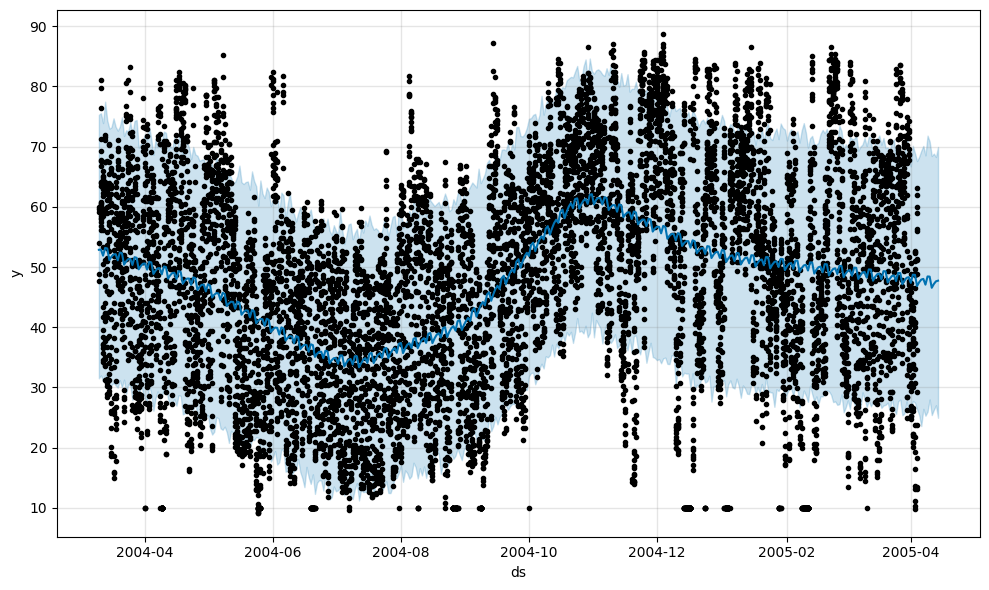

In [66]:
chart2 = model2.plot(forecast2)

In [67]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2004-03-10,46.767241,-17.518557,114.412889
1,2004-03-11,47.584381,-16.283671,109.346381
2,2004-03-12,41.472579,-27.031819,104.951174
3,2004-03-13,56.111715,-4.786352,121.305501
4,2004-03-14,54.203601,-9.165110,118.379957
...,...,...,...,...
396,2005-04-10,53.737321,-6.532944,118.852866
397,2005-04-11,51.367955,-11.763093,114.056113
398,2005-04-12,50.364680,-12.451110,114.895358
399,2005-04-13,46.153311,-12.945858,106.761044


In [68]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2004-03-10,52.863228,31.523088,75.283888
1,2004-03-11,52.908422,32.006950,75.528493
2,2004-03-12,51.885558,31.071770,73.900785
3,2004-03-13,53.178602,32.076937,77.456011
4,2004-03-14,53.081155,31.687399,74.365737
...,...,...,...,...
396,2005-04-10,48.407975,28.011177,70.850578
397,2005-04-11,46.557191,25.417728,68.435963
398,2005-04-12,47.179045,26.289463,68.833191
399,2005-04-13,47.623512,27.041053,68.268706


## Multiple Time Series Analysis

We can use Prophet with external regressors to predict one time series based on three others. In your case, you want to predict relative humidity (RH) using temperature (T), carbon monoxide (CO(GT)), and benzene (C6H6(GT)) as external variables.

In [71]:
# Define the Prophet model
model = Prophet()

# Add external regressors
model.add_regressor('T')         # Temperature as a regressor
model.add_regressor('CO(GT)')     # Carbon Monoxide as a regressor
model.add_regressor('C6H6(GT)')   # Benzene as a regressor

# Prepare the dataset
airquality_df_reg = airquality_df[['Date', 'RH', 'T', 'CO(GT)', 'C6H6(GT)']].copy()
airquality_df_reg.rename(columns={'Date': 'ds', 'RH': 'y'}, inplace=True)  # Rename columns for Prophet

# Fit the model
model.fit(airquality_df_reg)

# Create a future dataframe (10 periods ahead)
future = model.make_future_dataframe(periods=10)

# Ensure regressors have the same length as 'future'
future = future.merge(airquality_df[['Date', 'T', 'CO(GT)', 'C6H6(GT)']].rename(columns={'Date': 'ds'}), 
                      on='ds', how='left')

# Fill missing future values with the last available value (or extrapolate)
future.ffill(inplace=True)

# Make predictions
forecast = model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)  # Show last 10 predictions

13:43:04 - cmdstanpy - INFO - Chain [1] start processing
13:43:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
9357,2005-04-05,54.028471,30.029917,76.096468
9358,2005-04-06,55.353966,32.416500,78.631259
9359,2005-04-07,55.382683,32.672217,77.426527
9360,2005-04-08,55.282321,32.878745,77.390445
9361,2005-04-09,57.298557,35.851533,78.095034
9362,2005-04-10,59.544223,35.234861,82.596126
9363,2005-04-11,54.489991,31.497196,77.099559
9364,2005-04-12,53.592084,31.184320,76.633974
9365,2005-04-13,54.917578,31.105850,77.878762
9366,2005-04-14,54.946295,32.664105,77.096465


# AutoTS

In [73]:
from autots import AutoTS

In [74]:
# Create a new AutoTS object called model3 with a forecast length of 10
model3 = AutoTS(forecast_length=10)

Using 7 cpus for n_jobs.


In [75]:
# Convert the ds column of airquality_prophet to a datetime format 
airquality_prophet['ds'] = pd.to_datetime(airquality_prophet['ds'], format='%Y-%m-%d')

In [76]:
%%capture  # Stop any verbose in this cell

# Fit the model
model3 = model3.fit(airquality_prophet, date_col = 'ds', value_col = 'y')

13:44:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:45:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:45:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:45:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:50:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:50:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:51:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:53:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:53:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:53:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:53:21 - cmdstanpy - ERROR - Chain [1]

In [77]:
prediction3 = model3.predict()
prediction3

Prediction object: 
Return .forecast, 
 .upper_forecast, 
 .lower_forecast 
 .model_parameters 
 .transformation_parameters

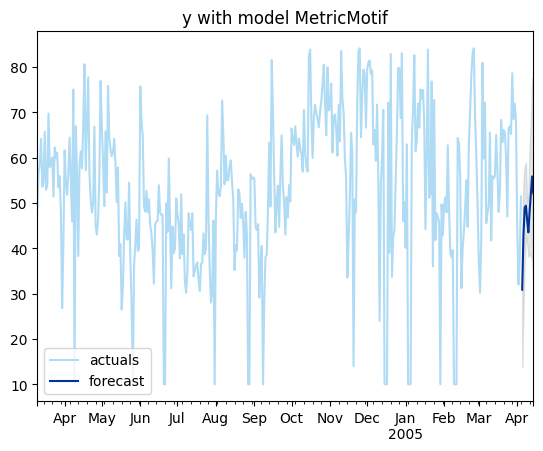

In [159]:
prediction3.plot(model3.df_wide_numeric,
                series=model3.df_wide_numeric.columns[0],
                start_date="2004-01-04");

In [79]:
forecast3 = prediction3.forecast
forecast3

,y
2005-04-05,30.862112
2005-04-06,42.527324
2005-04-07,48.919306
2005-04-08,49.389242
2005-04-09,46.188527
2005-04-10,43.492764
2005-04-11,48.146050
2005-04-12,51.913284
2005-04-13,55.840364
2005-04-14,52.094410


In [80]:
prediction3.upper_forecast

,y
2005-04-05,41.972852
2005-04-06,54.886875
2005-04-07,58.095412
2005-04-08,58.883245
2005-04-09,50.152452
2005-04-10,52.051658
2005-04-11,62.988656
2005-04-12,67.803720
2005-04-13,77.572084
2005-04-14,73.200920


In [81]:
prediction3.lower_forecast

,y
2005-04-05,13.688316
2005-04-06,26.149230
2005-04-07,37.089986
2005-04-08,42.593950
2005-04-09,40.955839
2005-04-10,38.123696
2005-04-11,38.748163
2005-04-12,38.354635
2005-04-13,37.549800
2005-04-14,32.916573


In [82]:
prediction3.forecast

,y
2005-04-05,30.862112
2005-04-06,42.527324
2005-04-07,48.919306
2005-04-08,49.389242
2005-04-09,46.188527
2005-04-10,43.492764
2005-04-11,48.146050
2005-04-12,51.913284
2005-04-13,55.840364
2005-04-14,52.094410


In [83]:
forecast2[['ds', 'yhat']].tail(10)

,ds,yhat
391,2005-04-05,47.472010
392,2005-04-06,47.916476
393,2005-04-07,48.030063
394,2005-04-08,47.075592
395,2005-04-09,48.437029
396,2005-04-10,48.407975
397,2005-04-11,46.557191
398,2005-04-12,47.179045
399,2005-04-13,47.623512
400,2005-04-14,47.737098


In [84]:
model3_results = model3.results()
model3_results

,ID,Model,ModelParameters,TransformationParameters,TransformationRuntime,FitRuntime,PredictRuntime,TotalRuntime,Ensemble,Exceptions,...,dwae_weighted,mqae_weighted,ewmae_weighted,uwmse_weighted,smoothness_weighted,wasserstein_weighted,dwd_weighted,custom_weighted,TotalRuntimeSeconds,Score
2103,a0a63b8180ce10e54097cc63a361cc1f,AverageValueNaive,"{""method"": ""Weighted_Mean"", ""window"": null}","{""fillna"": ""nearest"", ""transformations"": {""0"":...",0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0,NaN,...,1.583282,5.158363,27.375930,6.653853,0.450136,0.588999,2.413879,0.0,0.0000,13.375117
1894,d9809f827cc2bd4cf6ba341b0be4bb2b,MetricMotif,"{""window"": 7, ""point_method"": ""mean"", ""distanc...","{""fillna"": ""rolling_mean_24"", ""transformations...",0 days 00:00:00.025329,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.025329,0,NaN,...,1.846149,5.153274,31.611039,13.068158,1.334793,0.557263,1.298124,0.0,0.0253,13.431473
2106,cb66c846a859295e0024cccfcc38c10b,AverageValueNaive,"{""method"": ""trimmed_mean_20"", ""window"": null}","{""fillna"": ""rolling_mean"", ""transformations"": ...",0 days 00:00:00.014610,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.014610,0,NaN,...,1.682968,5.602807,28.928371,6.354798,0.511200,0.507596,2.354775,0.0,0.0146,13.633167
1988,42c6ead4b7b9a2fbd86bd144fd33d5f7,ARDL,"{""lags"": 2, ""trend"": ""ct"", ""order"": 1, ""causal...","{""fillna"": ""rolling_mean_24"", ""transformations...",0 days 00:00:00.017089,0 days 00:00:00,0 days 00:00:00.007911,0 days 00:00:00.025420,0,NaN,...,1.627874,5.016918,27.704216,5.568730,0.732772,0.440253,2.138889,0.0,0.0254,13.750252
1424,b9cbce358d1ad8b6a4a22921147c07fb,SeasonalityMotif,"{""window"": 10, ""point_method"": ""median"", ""dist...","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0 days 00:00:00.015742,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.015742,0,NaN,...,1.205589,3.091201,27.032286,3.875964,2.293800,0.631441,1.403685,0.0,0.0157,13.880112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,858dfc16a95d38c5165df83dca7868dc,SectionalMotif,"{""window"": 50, ""point_method"": ""midhinge"", ""di...","{""fillna"": ""zero"", ""transformations"": {""0"": ""F...",0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0,"Exception(""Transformer Cointegration failed on...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN
1832,e81973ddddad64222271c32351da05ca,SeasonalNaive,"{""method"": ""mean"", ""lag_1"": 7, ""lag_2"": null}","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0,"Exception(""Transformer FIRFilter failed on fit...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN
1855,163ccecead275fdd1eda35af91fd60ca,RRVAR,"{""method"": ""als"", ""rank"": 4, ""maxiter"": 200}","{""fillna"": ""median"", ""transformations"": {""0"": ...",0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0,Exception('Transformer ChangepointDetrend fail...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN
1977,b969ab4ca629c923972b29d0723f74e8,ARDL,"{""lags"": 2, ""trend"": ""ct"", ""order"": 0, ""causal...","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0,"Exception(""Transformer SinTrend failed on fit ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN


In [85]:
model3_results.columns

Index(['ID', 'Model', 'ModelParameters', 'TransformationParameters',
       'TransformationRuntime', 'FitRuntime', 'PredictRuntime', 'TotalRuntime',
       'Ensemble', 'Exceptions', 'Runs', 'Generation', 'ValidationRound',
       'ValidationStartDate', 'smape', 'mae', 'rmse', 'made', 'mage', 'mate',
       'matse', 'underestimate', 'mle', 'overestimate', 'imle', 'spl',
       'containment', 'contour', 'maxe', 'oda', 'dwae', 'mqae', 'ewmae',
       'uwmse', 'smoothness', 'wasserstein', 'dwd', 'custom', 'smape_weighted',
       'mae_weighted', 'rmse_weighted', 'made_weighted', 'mage_weighted',
       'mate_weighted', 'matse_weighted', 'underestimate_weighted',
       'mle_weighted', 'overestimate_weighted', 'imle_weighted',
       'spl_weighted', 'containment_weighted', 'contour_weighted',
       'maxe_weighted', 'oda_weighted', 'dwae_weighted', 'mqae_weighted',
       'ewmae_weighted', 'uwmse_weighted', 'smoothness_weighted',
       'wasserstein_weighted', 'dwd_weighted', 'custom_weight

In [86]:
model3_results['rmse']

2103    7.556028
1894    7.060127
2106    7.551458
1988    7.169901
1424    6.859011
          ...   
1831         NaN
1832         NaN
1855         NaN
1977         NaN
2592         NaN
Name: rmse, Length: 2715, dtype: float64

In [87]:
model3_results['Score']

2103    13.375117
1894    13.431473
2106    13.633167
1988    13.750252
1424    13.880112
          ...    
1831          NaN
1832          NaN
1855          NaN
1977          NaN
2592          NaN
Name: Score, Length: 2715, dtype: float64